<a href="https://colab.research.google.com/github/Ayonator77/Scientific-Computing/blob/main/Math_Land.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import timeit
# import random
from sympy import *
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from scipy.interpolate import make_interp_spline, BSpline

In [ ]:
def decToBase(n, base):
  '''Version 1.3. Converts Decimal integers, for n > 0, to any base. Returns string or list of the base representation. Works in python 3 and higher'''
  h = {10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F'} # enables bases up to 16
  ans = []
  while n > 0:
    remainder = n % base
    try:
      ans.insert(0, h[int(remainder)])
    except:
      ans.insert(0, int(remainder))
    n = n // base
  ans = ''.join(map(str, ans)) # this line of code changes the list to a string, comment this out for sage
  return ans

In [ ]:
print(decToBase(420, 2))

110100100


In [ ]:
def decToBaseMk2(x, base, decs=10):
  '''Version 1.1. Converts Decimal floats for x > 0, to any base with decimal precision decs (default = 10).'''
  h = {10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F'}
  fans = ['.']
  wans = ''
  c = 1
  n = x // 1
  if n != 0:
    wans += decToBase(n, base=base)
    fn = x - n
  else:
    fn = x
  while fn != 0:
    x = fn * base
    y = x // 1
    try:
      fans.append(h[int(y)])
    except:
      fans.append(int(y))
    if y >= 1:
      fn = x - y
    else:
      fn = x
    if c == decs:
      break
    c += 1
  fans = ''.join(map(str, fans))
  return wans + fans

In [ ]:
decToBaseMk2(29, 3, decs=23)

In [ ]:
def baseToDec(base_string, base):
  '''Version 1.1. converts a base string ex: 1010101110 into its base 10 representation. uses enumerated list'''
  h = {'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 16}
  bs = list(enumerate(base_string[::-1])) # reverses the string and turns it into an enumerated list
  dec = 0
  for i, num in bs:
    try:
      dec += (int(h[num]) * base**i)
    except:
      dec += (int(num) * base**i)
  return dec

In [ ]:
x = baseToDec('13', 8)
print(decToBaseMk2(x, 5))

21.


In [ ]:
103+25

128

In [ ]:
def superBiSecMethod(f, a, b, e = 1e-10):
  '''Finds roots of a function (f) on the interval [a, b] for f(r) < e using bisection method'''
  iterations = [a, b]
  if f(a) * f(b) < 0:
    while True:
      c = (a + b) / 2
      if f(a) * f(c) < 0:
        b = c
      else:
        a = c
      iterations.append(c)
      if abs(f(c)) < e:
        break
      elif f(c) == 0:
        print('Exact root located at:', c)
        break
  else:
    raise ValueError("function has no zero on given interval or special case")
  return c, iterations

In [ ]:
def superSecantMethod(f, x0, x1, e=1e-10):
  '''Finds roots of function f given two points x1 and x2 close enough to the root for f(r) < e using the secant method'''
  iterations = [x0, x1]
  while True:
    x2 = (x0 * f(x1) - x1 * f(x0)) / (f(x1) - f(x0))
    x0 = x1
    x1 = x2
    iterations.append(x2)
    if abs(f(x2)) < e:
      break
  return x0, iterations

In [ ]:
def superNewton(f, x0, e=1e-10):
  iterations = [x0]
  x = symbols('x')
  f_prime = lambdify(x, diff(f(x), x))
  while True:
    if f_prime(x0) == 0:
      raise ValueError('You messed up.')
    x1 = float(x0 - (f(x0) / f_prime(x0)))
    x0 = x1
    iterations.append(x0)
    if abs(f(x0)) < e:
      break
  return x0, iterations

Aprox. Root of f on interval [0, 1]: 0.32218535462608555
Aprox. Root of g on interval [0.5, 2]: 1.2361839280949407
Aprox. Root of h on interval [120, 130]: 126.6324360399887


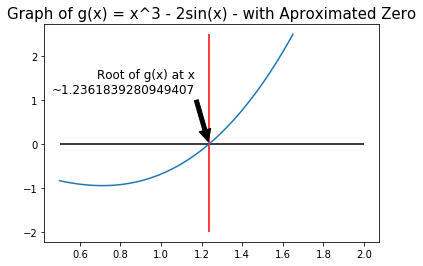

In [ ]:
# code for homework 4 - problem 7
try:
  import numpy as np # for functions
  import matplotlib.pyplot as plt # for graphing
except: # installs numpy to your environment if it is not already there
  !pip install numpy
  !pip install matplotlib
  import numpy as np
  import matplotlib.pyplot as plt

f = lambda x: x ** 3 + 3 * x - 1 # sample functions
g = lambda x: x ** 3 - 2 * np.sin(x)
h = lambda x: x + 10 - x * np.cosh(50 / x)

def problem7zeros(f, a, b, e = 1e-15):
  '''Finds roots of a function f (f) on the interval [a, b]
   using the root of line with points (a, f(a)) and (b, f(b)) with error e'''
  if f(a) * f(b) < 0:
    while True:
      if (b - a) != 0:
        m = (f(b) - f(a)) / (b - a) # slope
      else:
        raise ValueError('Divison by Zero occured')
      c = a - (f(a) / m) # root of linear equation
      if f(a) * f(c) < 0:
        b = c
      else:
        a = c
      if (abs(f(c)) < e) or (f(c) == 0):
        break
  else:
    raise ValueError('function has no zero on given interval or special case')
  return c

#Test Driver
r1 = problem7zeros(f, 0, 1)
r2 = problem7zeros(g, 0.5, 2)
r3 = problem7zeros(h, 120, 130)
print('Aprox. Root of f on interval [0, 1]:', r1)
print('Aprox. Root of g on interval [0.5, 2]:', r2)
print('Aprox. Root of h on interval [120, 130]:', r3)
x = np.linspace(0.5, 1.65, 100)
plt.plot(x, g(x))
plt.title('Graph of g(x) = x^3 - 2sin(x) - with Aproximated Zero',
          fontdict=dict(fontsize=15))
plt.hlines(0, 0.5, 2)
plt.vlines(r2, -2, 2.5, colors='r')
plt.annotate('Root of g(x) at x\n~' + str(r2), xy=(r2, 0), fontsize=12, xycoords='data',
            xytext=(.45, 0.8), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
plt.show()

BISECTION. root aproximated | f(r) < 1e-07 r: 250.8289337158203 in 17 iterations.
SECANT. root aproximated | f(r) < 1e-07 r: 250.828886810711 in 3 iterations.
NEWTONS. root aproximated | f(r) < 1e-07 r: 250.82893102968058 in 2 iterations.


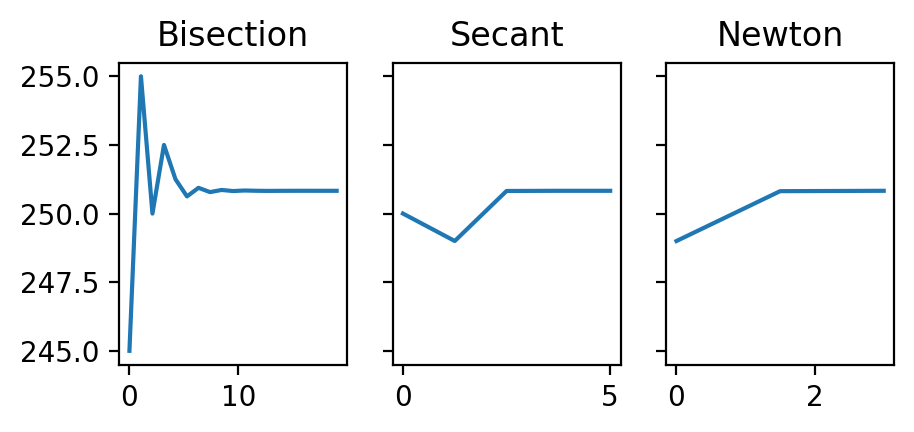

In [ ]:
g = lambda x: x*cosh(50 / x) - x - 5
error = 1e-7
rbs, ibs = superBiSecMethod(g, 245, 255, error)
rse, ise = superSecantMethod(g, 250, 249, error)
rnm, inm = superNewton(g, 249, error)
print('BISECTION. root aproximated | f(r) <', error,
      'r:', rbs, 'in', len(ibs)-2, 'iterations.')
print('SECANT. root aproximated | f(r) <', error,
      'r:', rse, 'in', len(ise)-2, 'iterations.')
print('NEWTONS. root aproximated | f(r) <', error,
      'r:', rnm, 'in', len(inm) -1, 'iterations.')
bisecit, secit, nit = np.asarray(ibs), np.asarray(ise), np.asarray(inm)
xbs, xs, xn = np.linspace(0, len(ibs), len(ibs)), np.linspace(0, len(ise), len(ise)),np.linspace(0, len(inm), len(inm))
f, (bs, sc, nt) = plt.subplots(1, 3, sharey=True)
f.set_figheight(2)
f.set_figwidth(5)
f.set_dpi(200)
bs.set_title("Bisection")
bs.plot(xbs, bisecit)
#axins = zoomed_inset_axes(nt, 3, loc=1)
#x1, x2, y1, y2 = 10, 15, 250.5, 251.2
#plt.yticks(visible=False)
#plt.xticks(visible=False)
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#mark_inset(nt, axins, loc1=3, loc2=4, ec='0.5')
sc.set_title("Secant")
sc.plot(xs, secit)
nt.set_title("Newton")
nt.plot(xn, nit)
plt.draw()


In [ ]:
h = lambda x: rnm * np.cosh(x / rnm) - 200
x = np.linspace(-50, 50, 200)
fill = np.linspace(0, 500, 10)
fig = plt.figure(figsize=(5, 3), dpi=200)
ax = plt.axes()
ax.axis([0, 500, -50, 100])
ax.set_facecolor('skyblue')
ax.set_adjustable('box')
plt.gca().set_aspect('equal')
ax.fill_between(fill, -50, color='g')
for i in range(-50, 550, 100):
  ax.plot([i+50, i+50], [0, h(-50)], c='saddlebrown', lw=2)
for i in range(0, 500, 100):
  ax.plot(x+i+50, h(x), c='black', lw=1)

In [ ]:
# HW 6 - Problem 8
# dependncies include: Numpy as np, and sympy*
def getCoefficients(x, y):
  '''returns array of coefficients from the top divided differences'''
  n = len(x)
  x, a = np.asarray(x), np.asarray(y)
  for i in range(1, n):
    a[i:n] = (a[i:n]-a[i-1])/(x[i:n]-x[i-1])
  return a

def newtonPoly(*data, Lambda=False):
  '''evaluates newton's interpolated polynomial at point x with data in the form
  (x1, x2, ... xn, y1, y2 ,.. yn) and returns the reduced polynomial.
  for lambda function use Lambda=True or False for Sympy Expresion
  default value of Lambda=False'''
  if len(data) % 2 != 0:
    raise ValueError("Please enter data in correct form: x1, x2, ... xn, y1, y2 ,.. yn")
  x = symbols('x')
  m = len(data) // 2
  x_data, y_data = data[:m], data[m:]
  a = getCoefficients(x_data, y_data)
  p = a[m-1]
  for i in range(1, m):
    p = a[m-1-i] + (x - x_data[m-1-i])*p # evaluate for pn(x)
  if Lambda:
    return lambdify(x, p.expand(), "numpy")
  else:
    return p.expand()

#Test Driver
#print('With y = x**2 in mind as a toy problem the program is used to interpolate the data:')
#print('X: 0, 1, 2, 3\ny: 0, 1, 4, 9\nReduced Polynomial:', newtonPoly(0,1,2,3,0,1,4,9))
#poly = newtonPoly(1,2,3,-4,5,2,48,272,1182,2262)
#polye = newtonPoly(1,2,3,-4,5,2,48,272,1182,2262, Lambda=True)
#print('\nFor Problem 8:\nx: 1, 2, 3, -4, 5\ny: 2, 48, 272, 1182, 2262')
#print('The unique polynomial that interprets this data is N(x) =', poly)
#print('Thus, N(-1) =', polye(-1))


In [ ]:
print(getCoefficients([-2,-1,0,1,2,3],[31,5,1,1,11,61]))
print(getCoefficients([-2,-1,0,1,2,3],[31,5,1,1,11,37]))
print(newtonPoly(-2,-1,0,1,2,3,31,5,1,1,11,61))
print(newtonPoly(-2,-1,0,1,2,3,31,5,1,1,11,37))

[ 31 -26  11  -3   1   0]
[ 31 -26  11  -3   1   0]
x**4 - x**3 + x**2 - x + 1
x**4 - x**3 + x**2 - x + 1


In [ ]:
def twoDNewtons(f1, f2, x0, y0, e=1e-10):
  '''Aproximates the root vector [r1, r2] given the vector value function f(x, y) = [f1, f2]
  with an error of e'''
  x, y = symbols('x y')
  f1dx = lambdify((x, y), diff(f1(x, y), x))
  f1dy = lambdify((x, y), diff(f1(x, y), y))
  f2dx = lambdify((x, y), diff(f2(x, y), x))
  f2dy = lambdify((x, y), diff(f2(x, y), y))
  while True:
    detj = float(f1dx(x0, y0)*f2dy(x0, y0)-f1dy(x0, y0)*f2dx(x0, y0))
    assert detj != 0
    h1 = float((f2dy(x0, y0)*f1(x0, y0)-f1dy(x0, y0)*f2(x0, y0)) / detj)
    h2 = float((f1dx(x0, y0)*f2(x0, y0)-f2dx(x0, y0)*f1(x0, y0)) / detj)
    x1, y1 = x0 - h1, y0 - h2
    x0, y0 = x1, y1
    if float((f1(x0, y0)**2 + f2(x0, y0)**2)**.5) < e:
      break
  return x0, y0

449.09976162946924 124.82064826272037


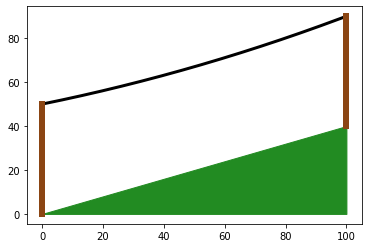

In [ ]:
# only 1st case line
f1 = lambda x, y: 40 + x*cosh(y/x) - x*cosh((100+y)/x)
f2 = lambda x, y: 23 + x*cosh((50+y)/x) - x*cosh((100+y)/x)
#f2 = lambda x, y: 3 +(x*cosh(y/x) - x*cosh((100+y)/x))/2
#f1 = lambda x, y: x*(cosh((200+y)/x) - cosh((100+y)/x))
#f2 = lambda x, y: (x/2)*(cosh((100+y)/x) - cosh((150+y)/x))
r1, r2 = twoDNewtons(f1, f2, 400, 400, e=1e-18)
print(r1, r2)
xn = np.linspace(0, 100, 200)
f = lambda x: r1*np.cosh((x+r2)/r1) - 416.55766
plt.plot(xn, f(xn), c='black', lw=3)
for i in range(0, 101, 100):
  plt.plot([i, i], [f(i) - 50, f(i)], c='saddlebrown', lw=6)
plt.fill_between([0,100], [0, 40], color='forestgreen')
plt.show()

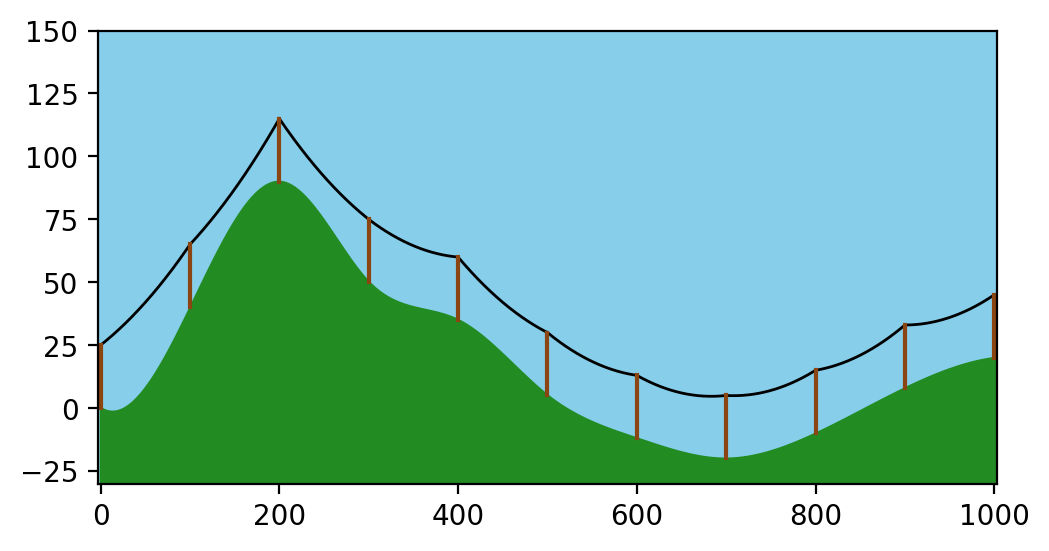

In [ ]:
# f1 and f2 given x = lambda and y = c
f = lambda x, l, c, h0: h0 + l*np.cosh((x+c)/l)
ints = np.array([0,100,200,300,400,500,600,700,800,900,1000])
relHeights = np.array([0, 40, 90, 50, 35, 5, -12, -20, -10, 8, 20]) # heights between poles
#file1 = open(r"/content/drive/My Drive/rootsForLatek.txt", 'a')
lambdas = []
cs = []

fig = plt.figure(1, (5.8,3), 200) # Case 2: Uneven Ground Figure
ax = plt.axes()
ax.axis([-3, 1003, -30, 150])
ax.set_facecolor('skyblue')

for i in range(10):
  a, b = i*100, (i+1)*100 # current interval [a, b]
  f1 = lambda x, y: x*cosh((a+y)/x)-x*cosh((b+y)/x)+relHeights[i+1]-relHeights[i] # Function 1 for interval
  f2 = lambda x, y: x*cosh((((a+b)/2)+y)/x)-x*cosh((b+y)/x)+((relHeights[i+1]-relHeights[i])/2)+3 # Function 2 for interval
  r1, r2 = twoDNewtons(f1, f2,  100, 100, e=1e-10) # find lambda and c
  x = np.linspace(int(a), int(b), 200) # x array for the lines
  x_new = np.linspace(0, 1000, 500) # x array for the ground
  spl = make_interp_spline(ints, relHeights, k=3) # smooth ground
  power_smooth = spl(x_new)
  v_shift = 25 + relHeights[i] - f(a, r1, r2, 0) # find h0
  ax.plot(x, f(x, r1, r2, v_shift), c='black', lw=1)
  ax.plot([a, a], [f(a, r1, r2, v_shift)-25, f(a, r1, r2, v_shift)], c='saddlebrown', lw=1.5)
  lambdas.append(r1)
  cs.append(r2)
  #file1.write('Interval ' + str(i+1) + r': \lambda \approx ' + str(r1) + r' c \approx ' + str(r2) + r' h_0 \approx ' + str(v_shift) + '\n')
#file1.close()
ax.plot([1000, 1000], [f(1000, r1, r2, v_shift)-25, f(1000, r1, r2, v_shift)] , c='saddlebrown', lw=1.5)
ax.fill_between(x_new, power_smooth, -30, color='forestgreen')
plt.show()

In [ ]:
l = lambda x, y: (x*(np.sinh((b+y)/x)-np.sinh((a+y)/x)))
file2 = open(r"/content/drive/My Drive/lengths.txt", 'a')
for i in range(len(lambdas)):
  a, b = i*100, (i+1)*100
  lent = l(lambdas[i], cs[i])
  file2.write("Cable " + str(i+1) + " Length: " + str(lent) + '\n')
file2.close()

In [ ]:
# Python code for HW-7 Question 6
def Richardson(f, x, n, h):
  d = np.zeros((n, n)) # initialize nxn array of zeros
  for i in range(n):
    d[i,0] = (f(x+h)-f(x-h)) / (2*h)
    for j in range(1, i+1):
      d[i, j] = d[i, j-1] + ((d[i,j-1] - d[i-1, j-1]) / ((4**j) - 1))
    h /= 2
  return d

f = lambda x: np.sin(x) # sample funciton
num = np.arccos(1/3) # use this for the value of x to get aprox .3333333...
d = Richardson(f, num, 10, 1) # n is equal to 10 and h is equal to 1 for this case
print("Derivative of f at x is approximately:", d[9,9]) # notice best aproximation is at [n, n]

In [ ]:
def trapezoid(f, a, b, n):
  tSum = 0
  h = (b - a) / n
  for i in range(n):
    tSum += (f(a + h*i) + f(a + h*(i+1)))
  return  (h*tSum) / 2

In [ ]:
f = lambda x: np.sin(x)
g = lambda x: np.e**-x
h = lambda x: np.arctan(x)
n = 100 # subintervals for all
fIntExact = 2
gIntClose = 0.632120558829
hIntClose = .438824573117
fIntAprox = trapezoid(f, 0, np.pi, n)
gIntAprox = trapezoid(g, 0, 1, n)
hIntAprox = trapezoid(h, 0, 1, n)
print("For f, The exact value is", fIntExact, "and the aproximated value is", fIntAprox)
print("For g, The exact value is about", gIntClose, "and the aproximated value is", gIntAprox)
print("For h, The exact value is about", hIntClose, "and the aproximated value is", hIntAprox)

For f, The exact value is 2 and the aproximated value is 1.999835503887444
For g, The exact value is about 0.632120558829 and the aproximated value is 0.6321258264911017
For h, The exact value is about 0.438824573117 and the aproximated value is 0.43882040641608583


In [ ]:
def tTrap(y, a, b, n):
  tSum = 0
  h = (b - a) / n
  for i in range(n):
    tSum += (y[i] + y[i+1])
    print(i)
  return (h*tSum) / 2

In [ ]:
f = lambda x: (x**2 + 2)**-1
ys = [10, 8, 7, 6, 5]
tTrap(ys, 1, 2, 4)

0
1
2
3


7.125